# Euclidean Distance Degree

A real algebraic variety is the common zero set of polynomials $f_1, \ldots, f_m \in \mathbb{R}[x_1,\ldots,x_n]$ denoted by $V(f_1,\ldots,f_m)$.

Consider the distance from a point $u \in \mathbb{R}^n$ to the variety $X=V(f_1,\ldots,f_m)$. What is the nearest point on $X$ to $u$ with respect to the euclidean distance? How many critical points are there? If we count the number of critical points over the complex numbers then this number will almost always be the same. It is called the *Euclidean distance degree* of $X$. 

<figure>
<img src="images/ed.png" alt="ED" style="width: 500px;"/>
<figcaption style="color:DIMGRAY">The real critical points of the euclidean distance function for the point $u= [-0.32, -0.1]$
    and $X=V((x^4 + y^4 - 1)(x^2 + y^2 - 2) + x^5y)$</figcaption>
</figure>

 In the following we want so show **you** can solve this problem on your own using techniques from numerical algebraic geometry.

For a given $u \in \mathbb{R}^n$ and $X=V(f_1,\ldots, f_m)$ we want to solve the problem:

$$\min =||x-u||_2=:d_u(x) \quad \text{subject to} \quad x \in X$$

Considering the geometry of the problem  you can see that a point $x^*$ is a critical point of $d_u$ if and only if
$x^* - u$ is orthogonal to the tangent space of $X$ at $x^*$, or formally
        \begin{equation}(x^* - u) \perp T_{(x^*)}X \,.\end{equation}

**Exercise**: Write down definining equations for our problem.

<details>
 <summary>A solution:</summary>
    Assume X=$V(f_1,\ldots, f_m)$ and $\dim(X)=n-m$. Let $J(x)$ the Jacobian of $f=(f_1,\ldots, f_m)$ where the $i$-th row consists of the partial derivatives of $f_i$.
    Then, critical points satisfy the equations
    $$x-u =J(x)^T \lambda$$
        $$f(x) = 0$$
            $$\lambda \in \mathbb{R}^m$$
    Note: These are the same equations you get from applying Lagrange multipliers to the optimization problem. Why?
 </details>

Now that we have the defining equations for our problem let's solve it using [HomotopyContinuation.jl](https://www.juliahomotopycontinuation.org).

In [10]:
# load HomotopyContinuation.jl
using HomotopyContinuation

To make our life easier we are already provided with some helper functions by the `TAGSS` package.

In [11]:
# load the TAGSS helper package
using TAGSS

We start by definining a variety. Let's take the variety from the beginning:
$$V((x^4 + y^4 - 1)(x^2 + y^2 - 2) + x^5y)$$

In [56]:
# We can define variables like this
@polyvar x y

(x, y)

Now let's set $f$ to the polynomial $(x^4 + y^4 - 1)(x^2 + y^2 - 2) + x^5y$

In [57]:
f = (x^4 + y^4 - 1)*(x^2 + y^2 - 2) + x^5*y # this will get deleted for the students

x⁶ + x⁵y + x⁴y² + x²y⁴ + y⁶ - 2x⁴ - 2y⁴ - x² - y² + 2

Let's visualize $V(f)$ to see whether we got it right. 

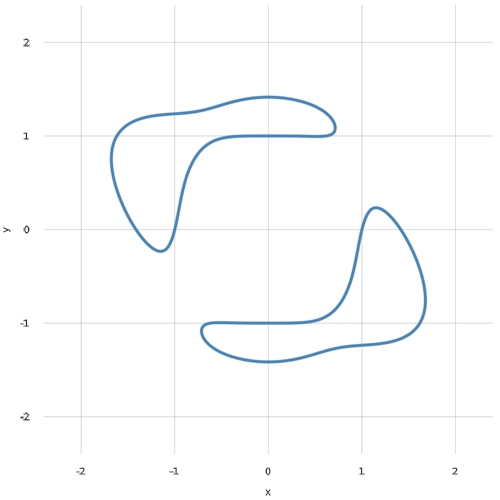

In [12]:
visualize(f, show_axis=true, scene_resolution=(500,500), x_min=-2, x_max=2)

Now we need to define the critical equations:

In [62]:
# we define new variables u₁, u₂ and λ₁
@polyvar u[1:2] λ
# define the jacobian of F
J = [differentiate(fᵢ, v) for fᵢ in [f], v in [x,y]]
# J' defines the transpose of J
F = [[x,y] - u - J'*λ; f] # this will get deleted for the students

3×1 Array{DynamicPolynomials.Polynomial{true,Int64},2}:
 -6x⁵λ - 5x⁴yλ - 4x³y²λ - 2xy⁴λ + 8x³λ + 2xλ + x - u₁ 
 -x⁵λ - 2x⁴yλ - 4x²y³λ - 6y⁵λ + 8y³λ + 2yλ + y - u₂   
 x⁶ + x⁵y + x⁴y² + x²y⁴ + y⁶ - 2x⁴ - 2y⁴ - x² - y² + 2

In [63]:
J = differentiate(f, [x;y])

2-element Array{DynamicPolynomials.Polynomial{true,Int64},1}:
 6x⁵ + 5x⁴y + 4x³y² + 2xy⁴ - 8x³ - 2x
 x⁵ + 2x⁴y + 4x²y³ + 6y⁵ - 8y³ - 2y  

In [65]:
J' * λ

1×2 LinearAlgebra.Adjoint{DynamicPolynomials.Polynomial{true,Int64},Array{DynamicPolynomials.Polynomial{true,Int64},1}}:
 6x⁵λ + 5x⁴yλ + 4x³y²λ + 2xy⁴λ - 8x³λ - 2xλ  …  x⁵λ + 2x⁴yλ + 4x²y³λ + 6y⁵λ - 8y³λ - 2yλ

The TAGSS package can also generate equations for you with
```julia
F, u = eq_equations(f)
```

Now that we have our equations let's define the point $u_0=[-0.32, -0.1]$

In [19]:
u₀ = [-0.32, -0.1] # this will get deleted for the students

2-element Array{Float64,1}:
 -0.32
 -0.1 

Our equation $F$ is still parameterized by $u$. So we have to make the substitution $u \Rightarrow u_0$.

In [20]:
F_u₀ = [subs(f, u => u₀) for f in F]

3-element Array{DynamicPolynomials.Polynomial{true,Float64},1}:
 -6.0x⁵λ₁ - 5.0x⁴yλ₁ - 4.0x³y²λ₁ - 2.0xy⁴λ₁ + 8.0x³λ₁ + 2.0xλ₁ + x + 0.32
 -x⁵λ₁ - 2.0x⁴yλ₁ - 4.0x²y³λ₁ - 6.0y⁵λ₁ + 8.0y³λ₁ + 2.0yλ₁ + y + 0.1     
 x⁶ + x⁵y + x⁴y² + x²y⁴ + y⁶ - 2.0x⁴ - 2.0y⁴ - x² - y² + 2.0             

$F_{u_0}$ is now a polynomial system of 3 equations in 3 unknowns. Homotopy continuation methods allow us to compute *all* solutions of this polynomial system. These methods first compute all solution over the *complex numbers*. Here we use the `solve` routine from HomotopyContinuation.jl as a black-box. You can find more background information on this method in the [How does it work?](https://www.juliahomotopycontinuation.org/guides/how-does-it-work/) guide on the [HomotopyContinuation.jl homepage](https://www.juliahomotopycontinuation.org).

In [22]:
res = solve(F_u₀; show_progress=false)

Result with 36 solutions
• 36 non-singular solutions (8 real)
• 0 singular solutions (0 real)
• 216 paths tracked
• random seed: 488318


We find that our problem has **36** solutions over the complex numbers (which is also the generic number of solutions).
Thus the *Euclidean distance degree* is 36.
Furthermore we can see that there are **8** real solutions.

Now let's extract the real points.

In [2]:
# Let's get all real solutions
real_sols = real_solutions(res)
# We have to remove our artifical variable λ₁
ed_points = map(p -> p[1:2], real_sols)

UndefVarError: UndefVarError: real_solutions not defined

Now let's find the optimal solution:

In [ ]:
using LinearAlgebra

dist, idx = findmin([norm(x - u) for x in ed_points])
println("Optimal solution: ", ed_points[idx], " with distance ", sqrt(dist), " to u₀")

We can also visualize our solutions:

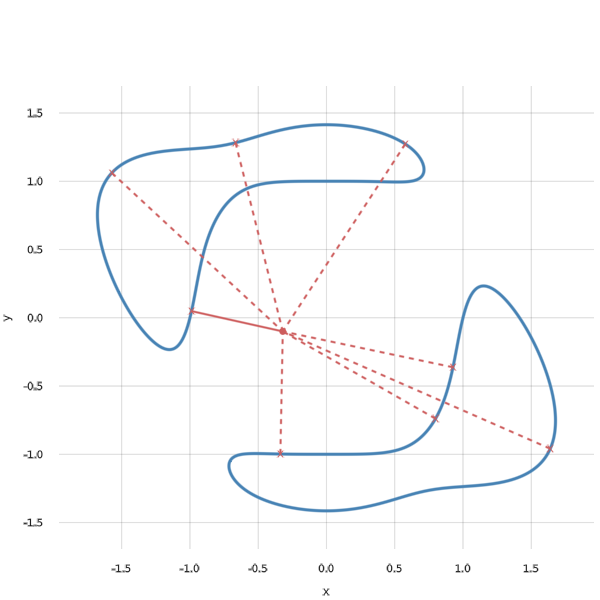

In [26]:
visualize_ed(f, u₀, ed_points; show_axis=true, scene_resolution=(600,600))

Great! This looks like our picture from the beginning.

## Surfaces in $\mathbb{R}^3$

The TAGSS package also provides us with the possibility to visualize surfaces in $\mathbb{R}^3$.

In [44]:
@polyvar x y z
#g=(x-0.75)^4-2x^2+(z+0.4)^4-3z^2+4y^2-1
g = (0.3*x^2+0.5z-0.3x+1.2*y^2-1.1)^2+(0.7*(y+0.5x)^2+y+1.2*z^2-1)^2-0.3

0.120625x⁴ + 0.24499999999999997x³y + 1.4549999999999998x²y² + 0.42x²z² + 0.9799999999999999xy³ + 1.68xyz² + 1.93y⁴ + 1.68y²z² + 1.44z⁴ - 0.18x³ + 0.35x²y + 0.3x²z + 0.6799999999999999xy² + 1.4y³ + 1.2y²z + 2.4yz² - 0.92x² - 1.4xy - 0.3xz - 3.04y² - 2.15z² + 0.66x - 2.0y - 1.1z + 1.91

Let's visualize the surface:

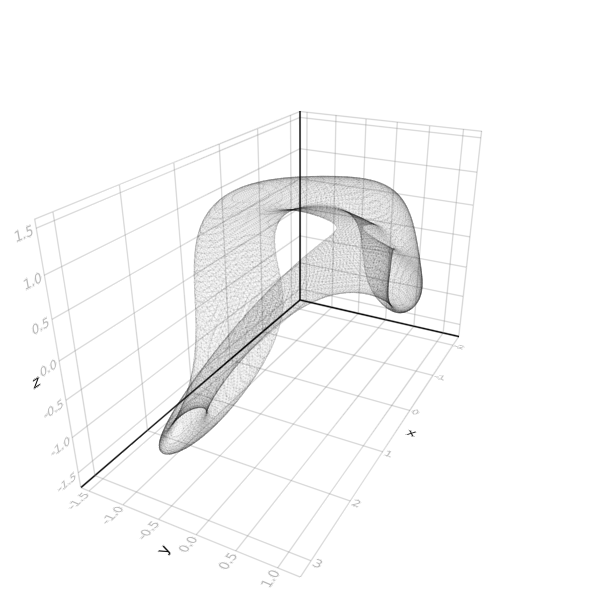

In [50]:
visualize(g; wireframe=true, scene_resolution=(600,600)) #you can also set wireframe=false to see a colored version of the surface

Let's pick a point in $\mathbb{R}^3$

In [36]:
u₀ = [0.5, 2.5, -1.2]

3-element Array{Float64,1}:
  0.5
  2.5
 -1.2

Now `TAGSS` also provides the black box routine `ed` to compute all real critical points. So let us be a little bit lazy and just use this function.

In [49]:
ed_pts = ed(g, u₀)

12-element Array{Array{Float64,1},1}:
 [-1.39548, -0.839435, -0.401547]
 [-1.44792, 0.417695, 0.0215216] 
 [1.87015, 0.248554, 0.0895588]  
 [1.29747, -0.8518, 1.28165]     
 [0.0318194, -1.33835, -0.994731]
 [2.86772, -0.211392, -0.0726226]
 [2.47834, -0.997498, -1.30827]  
 [0.502493, -0.302239, 1.03564]  
 [-0.201401, 0.930615, -0.310702]
 [-1.57298, -0.201582, 0.128285] 
 [1.5112, -0.883797, -1.21727]   
 [-1.48899, -0.507412, 0.123416] 

And let's visualize them:

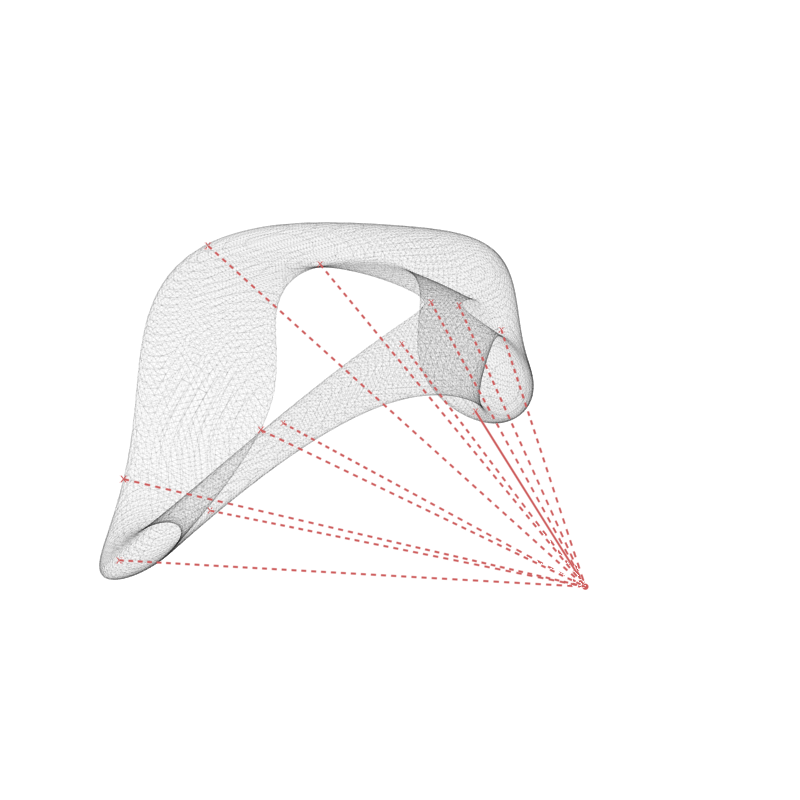

In [48]:
visualize_ed(g, u₀, ed_pts; show_axis=false, scene_resolution=(800,800))

You should also be able to get a rotating 3D picture from

In [47]:
display(visualize_ed(g, u₀, ed_pts; show_axis=false, scene_resolution=(800,800)));